In [1]:
import segyio
import numpy as np
import matplotlib.pyplot as plt
import pyarrow as pa

In [22]:
segy = "/oak/stanford/groups/biondo/data/marimba/0268_4C_MARIMBA/SHT_RAW_L00536P409.sgy"
# segy = "/oak/stanford/groups/biondo/data/aquistore/shots_segy/Apr_2013_shots_geom.sgy"

In [3]:
with segyio.open(segy, "r", ignore_geometry=True) as f:
    header = f.header[0]

In [4]:
header

{TRACE_SEQUENCE_LINE: 1, TRACE_SEQUENCE_FILE: 1, FieldRecord: 11, TraceNumber: 1, EnergySourcePoint: 1729, CDP: 18654, CDP_TRACE: 0, TraceIdentificationCode: 1, NSummedTraces: 1, NStackedTraces: 1, DataUse: 1, offset: 6635, ReceiverGroupElevation: 0, SourceSurfaceElevation: 0, SourceDepth: 50, ReceiverDatumElevation: 0, SourceDatumElevation: 0, SourceWaterDepth: 4960, GroupWaterDepth: 7400, ElevationScalar: -10, SourceGroupScalar: 1, SourceX: 345859, SourceY: 7495168, GroupX: 350827, GroupY: 7490771, CoordinateUnits: 1, WeatheringVelocity: 0, SubWeatheringVelocity: 0, SourceUpholeTime: 0, GroupUpholeTime: 0, SourceStaticCorrection: 0, GroupStaticCorrection: 0, TotalStaticApplied: 0, LagTimeA: 0, LagTimeB: 0, DelayRecordingTime: 0, MuteTimeStart: 0, MuteTimeEND: 0, TRACE_SAMPLE_COUNT: 5120, TRACE_SAMPLE_INTERVAL: 2000, GainType: 0, InstrumentGainConstant: 0, InstrumentInitialGain: 24, Correlated: 0, SweepFrequencyStart: 0, SweepFrequencyEnd: 0, SweepLength: 0, SweepType: 0, SweepTraceTa

In [3]:
headers = {
    "soux" : segyio.TraceField.SourceX,
    "souy" : segyio.TraceField.SourceY,
    "souid" : segyio.TraceField.FieldRecord,

    "recx" : segyio.TraceField.GroupX,
    "recy" : segyio.TraceField.GroupY,
    "recid" : segyio.TraceField.TraceNumber,
}

In [23]:
with segyio.open(segy, "r", ignore_geometry=True) as f:
    fid = f.attributes(segyio.TraceField.FieldRecord)[:]
    sx = f.attributes(segyio.TraceField.FieldRecord)[:]

In [18]:
np.unique(fid)[:]

array([ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172], dtype=int32)

In [24]:
np.unique(fid)[:]

array([ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 19

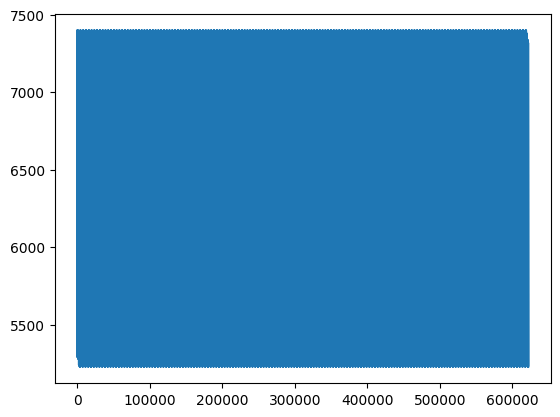

In [15]:
plt.plot(dpth[:])

In [4]:
import numba as nb
        
data = []
fields = []
with segyio.open(segy, "r", ignore_geometry=True) as f:
    traces = pa.array(list(segyio.tools.collect(f.trace[:])))
    data.append(traces)
    fields.append(pa.field("data", type=traces.type))
    for k, v in headers.items():
        h_arr = f.attributes(v)[:]
        fields.append(pa.field(k, type=pa.from_numpy_dtype(h_arr.dtype)))
        data.append(pa.array(h_arr))

In [5]:
schema = pa.schema(fields, metadata={"n1": str(2000), "d1": str(0.002), "o1": str(0), "label1": "Time"})

In [6]:
table = pa.Table.from_arrays(data, schema=schema)

In [7]:
table.schema

data: list<item: float>
  child 0, item: float
soux: int32
souy: int32
souid: int32
recx: int32
recy: int32
recid: int32
-- schema metadata --
n1: '2000'
d1: '0.002'
o1: '0'
label1: 'Time'

In [8]:
table.to_pandas()

,data,soux,souy,souid,recx,recy,recid
0,"[0.0019126565, 0.0040509365, 0.002056454, -0.0...",345859,7495168,11,350827,7490771,1
1,"[-0.0017379583, -3.676224e-05, 0.002005308, 0....",345859,7495168,11,350805,7490784,2
2,"[-0.0043454766, -0.0009968481, 0.0010114745, -...",345859,7495168,11,350784,7490797,3
3,"[-0.00880361, -0.0022167081, 0.0016301014, -0....",345859,7495168,11,350762,7490809,4
4,"[-0.0011340773, -0.0025810648, -0.007654857, -...",345859,7495168,11,350740,7490821,5
...,...,...,...,...,...,...,...
622075,"[0.050997365, 0.07573336, 0.046909753, -0.0859...",351822,7491416,172,346247,7494573,3836
622076,"[-0.05980525, -0.026154574, 0.11096066, 0.0623...",351822,7491416,172,346226,7494587,3837
622077,"[-0.007549364, 0.0546799, 0.1913352, -0.004857...",351822,7491416,172,346204,7494599,3838
622078,"[-0.053516593, 0.0034433831, 0.08474088, 0.088...",351822,7491416,172,346183,7494612,3839


In [62]:
import pyarrow.parquet as pq
import pathlib
import os

base = pathlib.Path(os.environ["SCRATCH"] + "/example")
base.mkdir(exist_ok=True)
path = base / "2.parquet"
with path.open("wb") as sink:
    with pq.ParquetWriter(sink, schema) as writer:
        writer.write_batch(batch)

In [19]:
import pathlib
def get_files_with_extension(directory: str, extension: str) -> list:
  """
  Returns a list of full file paths (as strings) with the given extension 
  in the specified directory.

  Args:
    directory: The directory to search in.
    extension: The file extension to match (e.g., "txt", "csv", "jpg").

  Returns:
    A list of strings representing the full paths of the matching files.
  """

  path = pathlib.Path(directory)
  return [str(file) for file in path.glob(f"*.{extension}")]

In [20]:
files = get_files_with_extension("/oak/stanford/groups/biondo/data/aquistore/shots_segy", "sgy")

In [21]:
files

['/oak/stanford/groups/biondo/data/aquistore/shots_segy/Nov_2016_shots_geom.sgy',
 '/oak/stanford/groups/biondo/data/aquistore/shots_segy/Nov_2013_shots_geom.sgy',
 '/oak/stanford/groups/biondo/data/aquistore/shots_segy/Mar_2018_shots_geom.sgy',
 '/oak/stanford/groups/biondo/data/aquistore/shots_segy/Mar_2016_shots_geom.sgy',
 '/oak/stanford/groups/biondo/data/aquistore/shots_segy/Apr_2013_shots_geom.sgy',
 '/oak/stanford/groups/biondo/data/aquistore/shots_segy/Mar_2012_shots_NO_geom.sgy']

In [23]:
import os
os.path.splitext(files[0])

('/oak/stanford/groups/biondo/data/aquistore/shots_segy/Nov_2016_shots_geom',
 '.sgy')

In [15]:
with segyio.open(files[0], "r", ignore_geometry=True) as f:
    header = f.header[:]

In [155]:
base = pathlib.Path(os.environ["SCRATCH"] + "/example")
base.mkdir(exist_ok=True)
path = base / ("2.parquet" + "s")

In [156]:
path

PosixPath('/scratch/users/arustam/example/2.parquets')

In [63]:
import pyarrow.dataset as ds

dataset = ds.dataset(base, format="parquet")

In [65]:
dataset.files

['/scratch/users/arustam/example/1.parquet',
 '/scratch/users/arustam/example/2.parquet']

In [66]:
dataset.schema

data: list<element: float>
  child 0, element: float
soux: int32
souy: int32
souid: int32
recx: int32
recy: int32
recid: int32
-- schema metadata --
n1: '2000'
d1: '0.002'
o1: '0'
label1: 'Time'

In [71]:
table = dataset.to_table(filter=ds.field('souid') == 7)

In [131]:
rx = table["recx"].combine_chunks().to_numpy()
ry = table["recy"].combine_chunks().to_numpy()
ids = table["recid"].combine_chunks().to_numpy()

In [139]:
sx = np.unique(table["soux"].combine_chunks().to_numpy())
sy = np.unique(table["souy"].combine_chunks().to_numpy())

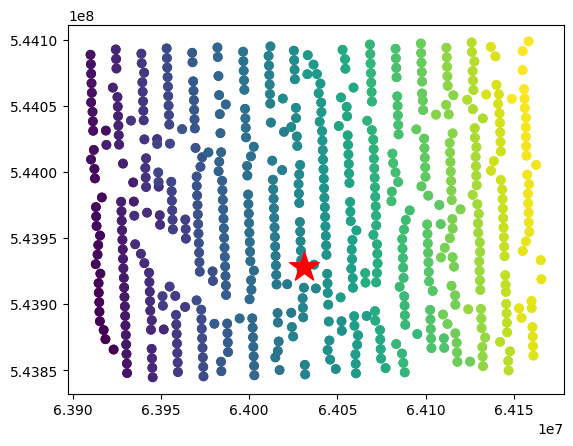

In [148]:
plt.scatter(rx, ry, c=ids, cmap="viridis")
plt.scatter(sx, sy, marker="*", c="red", s=500)

In [135]:
np.mean(ids)

np.float64(298.0)

In [5]:
# traces = np.vstack(table["data"].to_numpy())
amax = np.amax(arr)

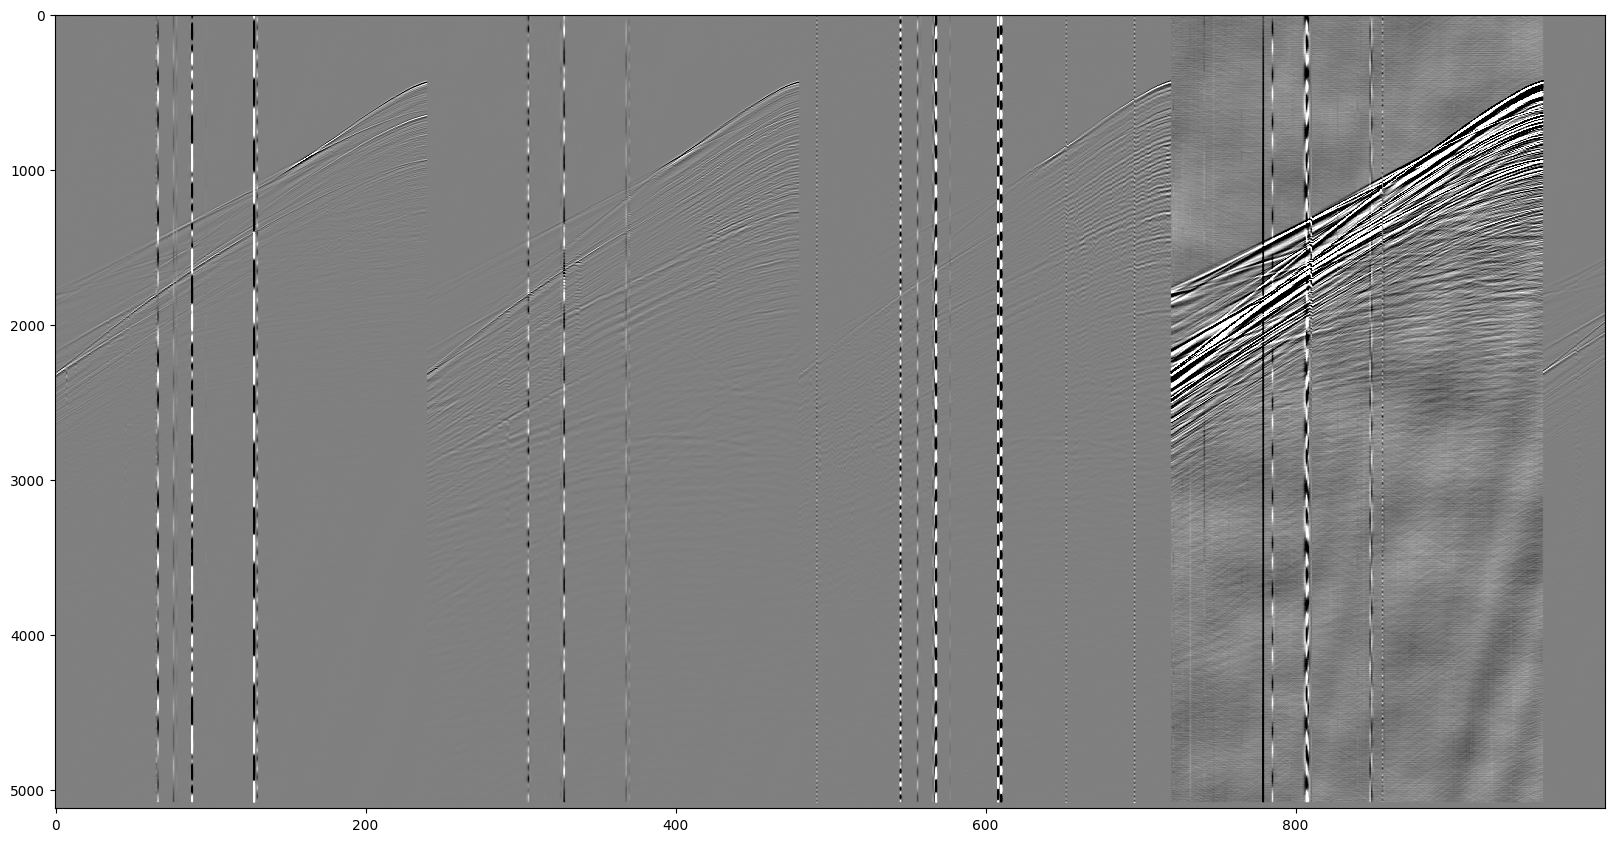

In [7]:
pclip = 0.001
plt.figure(figsize=[20,40])
plt.imshow(arr[:1000,:].T, cmap="gray", clim=(-pclip*amax, pclip*amax), aspect=.1)

In [91]:
somedata = sliced["trace"].flatten().to_numpy().reshape((ntrace,2000))

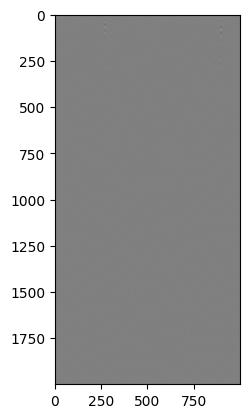

In [92]:
plt.imshow(somedata.T, cmap="gray")